In [1]:
import numpy as np
from keras import datasets, models, layers, optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

# **Step 1 : Load the data**

In [2]:
# Load the data 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

Lets select only 3 classes.

In [4]:
# Choose 3 first classes
train_indexes = np.where(train_labels == [0,1,2])[0]
test_indexes = np.where(test_labels == [0,1,2])[0]

train_labels = train_labels[train_indexes]
train_images = train_images[train_indexes]


test_labels = test_labels[test_indexes]
test_images = test_images[test_indexes]

In [5]:
# Inspect the data
np.unique(train_labels)

array([0, 1, 2], dtype=uint8)

In [6]:
train_images[1]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

# **Step 2 : Prepare the data**

In [7]:
# Reshape the data
train_images = train_images.reshape((15000, 32*32*3))
test_images = test_images.reshape((3000, 32*32*3))

In [8]:
test_images.shape

(3000, 3072)

In [9]:
# Normalize the pixels values to be between 0 and 1
train_images, test_images = train_images.astype('float32') / 255 , test_images.astype('float32') / 255
train_images[0]

array([0.6666667 , 0.7058824 , 0.7764706 , ..., 0.28627452, 0.3019608 ,
       0.3137255 ], dtype=float32)

In [10]:
# Vectorize the target using categorical encoding
# Inspect two targets before encoding
train_labels[0], test_labels[1]

(array([1], dtype=uint8), array([1], dtype=uint8))

In [11]:
# Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Inspect targets after encoding for verification
train_labels[0], test_labels[1]

(array([0., 1., 0.], dtype=float32), array([0., 1., 0.], dtype=float32))

Since we have 5000 observations per classes for training we 5000 x 3 = 15000 total of observations for training in this exercice, since we only use 3 classes.

We will use 4000 observations per class for training and 1000 for validations, so we will have a total of 12000 observations for training and 3000 for testing.

In [12]:
# Split the training data into training and validation sets
x_train = train_images[:12000] #12000 for training and the rest for validation
y_train = train_labels[:12000]

x_val = train_images[12000:]
y_val = train_labels[12000:]

In [13]:
train_images.shape

(15000, 3072)

# **Step 3 : Build the network**

In [14]:
model = models.Sequential()
model.add(layers.Dense(3072, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4 : Training and validation**

In [16]:
history = model.fit(x_train, y_train, epochs=200, batch_size=500, validation_data=(x_val,y_val))

Epoch 1/200
24/24 [==============================] - 3s 33ms/step - loss: 4.0181 - accuracy: 0.3460 - val_loss: 1.0608 - val_accuracy: 0.3957
Epoch 2/200
24/24 [==============================] - 0s 13ms/step - loss: 1.0579 - accuracy: 0.4166 - val_loss: 1.0145 - val_accuracy: 0.5433
Epoch 3/200
24/24 [==============================] - 0s 13ms/step - loss: 0.9849 - accuracy: 0.5312 - val_loss: 0.9364 - val_accuracy: 0.6097
Epoch 4/200
24/24 [==============================] - 0s 13ms/step - loss: 0.9086 - accuracy: 0.6211 - val_loss: 0.8713 - val_accuracy: 0.6280
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.8259 - accuracy: 0.6700 - val_loss: 0.7989 - val_accuracy: 0.6707
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.7690 - accuracy: 0.6854 - val_loss: 0.7688 - val_accuracy: 0.6840
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.7512 - accuracy: 0.6861 - val_loss: 0.7739 - val_accuracy: 0.6677
Epoch 

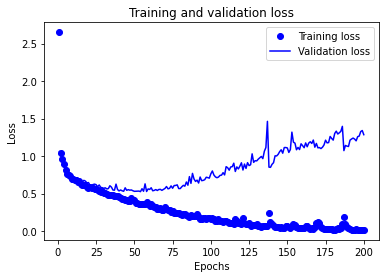

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, 'bo', label='Training loss') #blue dots
plt.plot(epochs,val_loss, 'b', label='Validation loss') #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

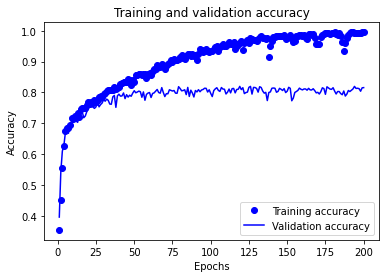

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, 'bo', label='Training accuracy') #blue dots
plt.plot(epochs,val_acc, 'b', label='Validation accuracy') #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We see that the after the 50th epochs we start overfitting.
Moreover our network look very complicated for the problem at hand and the learning rate does not look appropriate as shown by the instabilities in the validation loss.

# **Hyper-parameters tuning**

In [19]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200, batch_size=500, validation_data=(x_val,y_val))

Epoch 1/200
24/24 [==============================] - 1s 17ms/step - loss: 1.0679 - accuracy: 0.4726 - val_loss: 0.8205 - val_accuracy: 0.6670
Epoch 2/200
24/24 [==============================] - 0s 7ms/step - loss: 0.7940 - accuracy: 0.6752 - val_loss: 0.7766 - val_accuracy: 0.6903
Epoch 3/200
24/24 [==============================] - 0s 7ms/step - loss: 0.7455 - accuracy: 0.7005 - val_loss: 0.7445 - val_accuracy: 0.7050
Epoch 4/200
24/24 [==============================] - 0s 7ms/step - loss: 0.7162 - accuracy: 0.7177 - val_loss: 0.7322 - val_accuracy: 0.7083
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.7266 - val_loss: 0.7165 - val_accuracy: 0.7160
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 0.6760 - accuracy: 0.7330 - val_loss: 0.7076 - val_accuracy: 0.7243
Epoch 7/200
24/24 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.7388 - val_loss: 0.6869 - val_accuracy: 0.7317
Epoch 8/200


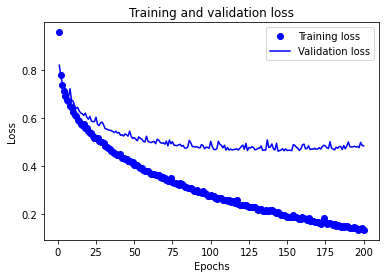

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, 'bo', label='Training loss') #blue dots
plt.plot(epochs,val_loss, 'b', label='Validation loss') #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

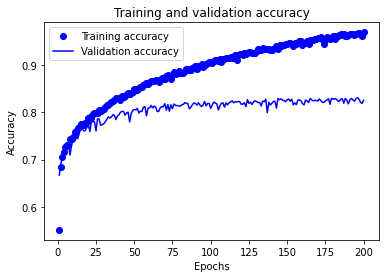

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, 'bo', label='Training accuracy') #blue dots
plt.plot(epochs,val_acc, 'b', label='Validation accuracy') #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This loss curve looks better, the validation and training accuracy has improve a little. But I notice that after the 100 epoch, the validation accuracy stops improving, so I should stop there. Can I have a simpler model ?

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=500, validation_data=(x_val,y_val))

Epoch 1/100
24/24 [==============================] - 1s 12ms/step - loss: 1.0538 - accuracy: 0.4596 - val_loss: 0.9126 - val_accuracy: 0.6027
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8657 - accuracy: 0.6417 - val_loss: 0.8394 - val_accuracy: 0.6503
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8129 - accuracy: 0.6778 - val_loss: 0.8166 - val_accuracy: 0.6683
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.7782 - accuracy: 0.6915 - val_loss: 0.7889 - val_accuracy: 0.6803
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.7655 - accuracy: 0.6909 - val_loss: 0.7800 - val_accuracy: 0.6820
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.7376 - accuracy: 0.7043 - val_loss: 0.7686 - val_accuracy: 0.6933
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.7406 - accuracy: 0.7028 - val_loss: 0.7566 - val_accuracy: 0.6917
Epoch 8/100


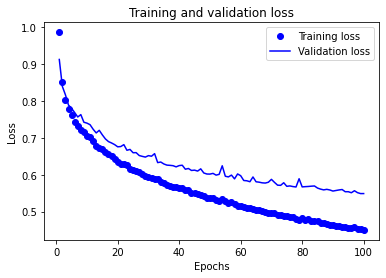

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
#loss = [ sum(loss[key:key+5])/5 for key, val in enumerate(range(1, len(loss) + 1,5)) if key != 199]
#val_loss = [ sum(val_loss[key:key+5])/5 for key, val in enumerate(range(1, len(val_loss) + 1,5)) if val != 200]
plt.plot(epochs, loss, 'bo', label='Training loss') #blue dots
plt.plot(epochs, val_loss, 'b', label='Validation loss') #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

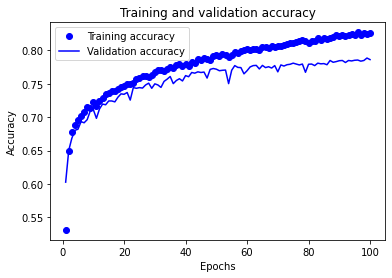

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, 'bo', label='Training accuracy') #blue dots
plt.plot(epochs,val_acc, 'b', label='Validation accuracy') #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

I realize that the model is a little too simplistic, so I am going to pic the previous model. 

# **Step 5 : Final model and performance evaluation**

I will train on all the training variables so I will join the training and validation set

In [25]:
train_images.shape, test_images.shape

((15000, 3072), (3000, 3072))

In [26]:
# Save an instance to test the final model 
inst_image = test_images[-1]
inst_label = test_labels[-1]

In [27]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=500)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 1.1278 - accuracy: 0.4269
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.8053 - accuracy: 0.6671
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 0.7540 - accuracy: 0.6966
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.7092 - accuracy: 0.7210
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.7253
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6726 - accuracy: 0.7367
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.7450
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6516 - accuracy: 0.7379
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.7604
Epoch 10/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6153 - accuracy: 0.7583
Epoch 11/

In [28]:
score = model.evaluate(test_images[:-1], test_labels[:-1])
score

94/94 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8229


[0.44819989800453186, 0.82294100522995]

# **Save the model and the weights**

In [29]:
model.save("/content/drive/My Drive/Colab Notebooks/CS577_colab/CIFAR3.h5")

Load and test the model

In [30]:
model_loaded = models.load_model("/content/drive/My Drive/Colab Notebooks/CS577_colab/CIFAR3.h5")

In [31]:
result = model_loaded.predict(inst_image.reshape(1,-1))

In [32]:
np.argmax(result)

2

In [33]:
inst_label

array([0., 1., 0.], dtype=float32)

The model works !